# Load Igor-exported HDF5 data

We load the script to load the HDF5 files exported from Igor Wavemetrics

In [1]:
from analyz.IO.igor import load_hdf5_exported_from_Igor as load_data

We build a `data` object (a python dictionary that stores all the data details) form the HDF5 file exported by IGOR based on a ".pxp" experiment file

In [2]:
import os, sys

In [3]:
fn = 'D:DATA\Data_Nunzio\2020\April\nm30Apr2020c0\nm30Apr2020c0_000.h5'

In [4]:
if sys.platform=='win32': # If WINDOWS OS
    root_data_folder = os.path.join('D:\\', 'DATA', 'Data_Nunzio') # Windows path type
else:
    root_data_folder = os.path.join('D:\\', 'DATA', 'Data_Nunzio') # UNIX path type
    
fn = os.path.join(root_data_folder,'2018','April','nm17Apr2019c1','nm17Apr2019c1_000_ctrl.h5')
#fn = os.path.join(root_data_folder,'2020','April','nm30Apr2020c0','nm30Apr2020c0_000.h5')

In [5]:
#fn = '/media/yann/DATADRIVE1/Yann_Backup/DATA/Data_Nunzio/2018/April/nm17Apr2019c1/nm17Apr2019c1_000_ctrl.h5'
data = load_data(fn, dt_subsampling=0.1, verbose=True)

- temporal sampling, original time step: 0.010ms
    --> subsampled at 0.100ms
- Recordings channels:
  * 0) Irecording2 in nA
- Stimulation channels:
  * 0) Vcommand2 in mV
  * 1) stim in V


In [6]:
# let's explore this object:
data.keys()

dict_keys(['recordings', 'stimulations', 'Metadata', 't'])

## "recordings"

The `recordings` dictionary stores the data acquired during the experiment

In [7]:
data['recordings']

{'Irecording2': array([[0.52902351, 0.5090531 , 0.50583207, ..., 0.54834971, 0.54577288,
         0.53288875],
        [0.53997502, 0.54577288, 0.52966772, ..., 0.54255185, 0.5567244 ,
         0.54641709],
        [0.56509908, 0.56960853, 0.57089694, ..., 0.58700211, 0.596021  ,
         0.58571369],
        ...,
        [0.57218535, 0.57991583, 0.57218535, ..., 0.61148196, 0.61405879,
         0.61921244],
        [0.60375148, 0.57927163, 0.58056004, ..., 0.58764631, 0.59344417,
         0.59215576],
        [0.60375148, 0.59215576, 0.59795362, ..., 0.59924203, 0.6153472 ,
         0.5863579 ]])}

Each recorded signal has a specific key (e.g. `"Irecording2"` above) and is stored as a numpy array of shape (nepisode, nsample)

In [8]:
# let's check the shape:
print(data['recordings']['Irecording2'].shape)
print(data['Metadata']['NumStimReps'], len(data['t'])) # to be compared with (nepisode, nsample)

(15, 10000)
15.0 10000


## "stimulations"

The `stimulations` dictionary stores the stimuli used during the experiment.

In [9]:
data['stimulations']

{'Vcommand2': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'stim': array([-1.27474777e-08, -5.67011949e-09, -1.35104194e-08, ...,
        -2.23884982e-08, -7.81435983e-09, -3.26167893e-08], dtype=float32)}

Each sent signal has a specific key (e.g. `"stim"` and `"Vcommand2"` above) and is stored as a numpy array of shape either (nepisode, nsample) or (nsample,) depending on whether the stimulus was varied over episodes or not.

## "t"

the `data` dictionary has a key `t` that correspond to the time axis of the acquisition (it is very convenient to have this array pre-constructed for quick-analysis with `numpy`).

In [10]:
print(data['t'])

[0.000e+00 1.000e-01 2.000e-01 ... 9.997e+02 9.998e+02 9.999e+02]


## "Metadata"

The metadata are stored in the `data` dictionary under the key `Metadata`, it is itself a dictionary with keys corresponding to features stored within the Igor experiement file.

In [11]:
import pprint # pretty print for this dictionary
pprint.pprint(data['Metadata'])

{'AcqMode': 0.0,
 'BoardConfigs': {'ADCboard': array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan], dtype=float32),
                  'ADCchan': array([ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan], dtype=float32),
                  'ADCgain': array([ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan], dtype=float32),
                  'ADCmode': array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
      dtype=object),
                  'ADCname': array(['Irecording2', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', ''], dtype=object),
                  'ADCscale': array([0.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan], dtype=float32),
                  'ADCtgain': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan], dtype=float32),
                  'ADCun

# Example analysis

In [12]:
# import numpy for numerical analysis
import numpy as np
# import a data visualizaiton module
from datavyz import graph_env_notebook as ge

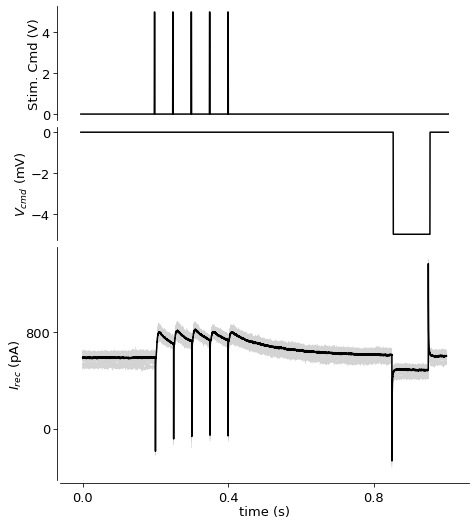

In [13]:
fig, AX = ge.figure(axes_extents=[[[2,1]],[[2,1]],[[2,2]]], hspace=0.1)
## STIMULATIONS
AX[0].plot(data['t'], data['stimulations']['stim'], 'k')
AX[1].plot(data['t'], data['stimulations']['Vcommand2'], 'k')
ge.set_plot(AX[0], ['left'], ylabel='Stim. Cmd (V)')
ge.set_plot(AX[1], ['left'], ylabel='$V_{cmd}$ (mV)')
## RECORDINGS
# compute trial-average
mean = data['recordings']['Irecording2'].mean(axis=0)
ge.plot(1e-3*data['t'], Y=1e3*data['recordings']['Irecording2'],
        COLORS=['lightgray' for i in range(data['recordings']['Irecording2'].shape[0])], lw=0.3, ax=AX[2])
AX[2].plot(1e-3*data['t'], 1e3*mean, 'k', label='trial-average')
ge.set_plot(AX[2], ylabel='$I_{rec}$ (pA)', xlabel='time (s)')